In [3]:
# default_exp algo.dl.pytorch

%reload_ext autoreload
%autoreload 2

# algo-dl-pytorch
PyTorch是由Facebook的人工智能部门开发的机器学习和深度学习工具。 

它是使用Python和C ++语言编写的。 

It’s a Python-based scientific computing package targeted at two sets of audiences:

    A replacement for NumPy to use the power of GPUs
    a deep learning research platform that provides maximum flexibility and speed
    
您可以在需要时重用自己喜欢的Python软件包（例如NumPy，SciPy和Cython）来扩展PyTorch。

https://pytorch.org/

https://github.com/pytorch/pytorch

https://pytorch.org/tutorials/

## pytorch处理序列任务示例
[pytorch官方示例](demo_seq_cls/pytorch官方示例.ipynb)

## install

In [3]:
# !pip install torch -U #-i https://pypi.tuna.tsinghua.edu.cn/simple

!pip freeze | grep torch

spectra-torch==0.4.0
torch==1.6.0
torchaudio==0.5.1
torchsummary==1.5.1
torchtext==0.7.0
torchvision==0.4.2


In [23]:
import torch

In [2]:
torch.version.__version__

'1.5.0'

In [4]:
None == None

True

In [5]:
None != None

False

## cuda相关

In [120]:
torch.cuda.is_available()

False

In [130]:
torch.cuda.device_count()

0

### PyTorch中使用指定的GPU
1.1 直接终端中设定：

CUDA_VISIBLE_DEVICES=1 python my_script.py

1.2 python代码中设定：

    import os
    os.environ["CUDA_VISIBLE_DEVICES"] = "2"

使用函数 set_device 

过官方建议使用CUDA_VISIBLE_DEVICES，不建议使用 set_device 函数。

    import torch
    torch.cuda.set_device(id)



## pytorch处理框架

### 环境初始化

In [7]:
# 构建数据迭代器
# 构建MyDataset实例
train_data = RMBDataset(data_dir=train_dir, transform=train_transform)
valid_data = RMBDataset(data_dir=valid_dir, transform=valid_transform)

# 构建DataLoder
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_data, batch_size=BATCH_SIZE)
# 构建网络并初始化
net = LeNet(classes=2)
net.initialize_weights()
# 初始化loss
criterion = nn.CrossEntropyLoss() 
# 初始化optim
optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9)            
# 初始化lr_scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


### train

In [ ]:
for epoch in range(MAX_EPOCH):

    loss_mean = 0.
    correct = 0.
    total = 0.

    net.train()
    for i, data in enumerate(train_loader):

        # forward
        inputs, labels = data
        outputs = net(inputs)

        # backward
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()

        # update weights
        optimizer.step()

        # 统计分类情况
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).squeeze().sum().numpy()

        # 打印训练信息
        loss_mean += loss.item()
        train_curve.append(loss.item())
        if (i+1) % log_interval == 0:
            loss_mean = loss_mean / log_interval
            print("Training:Epoch[{:0>3}/{:0>3}] Iteration[{:0>3}/{:0>3}] Loss: {:.4f} Acc:{:.2%}".format(
                epoch, MAX_EPOCH, i+1, len(train_loader), loss_mean, correct / total))
            loss_mean = 0.

    scheduler.step()  # 更新学习率

    # validate the model
    if (epoch+1) % val_interval == 0:

        correct_val = 0.
        total_val = 0.
        loss_val = 0.
        net.eval()
        with torch.no_grad():
            for j, data in enumerate(valid_loader):
                inputs, labels = data
                outputs = net(inputs)
                loss = criterion(outputs, labels)

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).squeeze().sum().numpy()

                loss_val += loss.item()

            valid_curve.append(loss_val)
            print("Valid:\t Epoch[{:0>3}/{:0>3}] Iteration[{:0>3}/{:0>3}] Loss: {:.4f} Acc:{:.2%}".format(
                epoch, MAX_EPOCH, j+1, len(valid_loader), loss_val, correct / total))


### inference

### Operations

In [13]:
y = torch.rand(5, 3)

#### Addition: syntax 1

In [13]:
x + y

tensor([[ 0.7032, -1.2390,  1.5754],
        [-1.3122, -0.1154, -0.2655],
        [ 1.1924,  1.6143,  0.1924],
        [-0.5584, -1.9609,  3.2666],
        [-0.1971,  1.6196, -0.4365]])

#### Addition: syntax 2

In [14]:
torch.add(x, y)

tensor([[ 0.7032, -1.2390,  1.5754],
        [-1.3122, -0.1154, -0.2655],
        [ 1.1924,  1.6143,  0.1924],
        [-0.5584, -1.9609,  3.2666],
        [-0.1971,  1.6196, -0.4365]])

#### Addition: providing an output tensor as argument

In [15]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)  # 这样的好处是节约内存
result

tensor([[ 0.7032, -1.2390,  1.5754],
        [-1.3122, -0.1154, -0.2655],
        [ 1.1924,  1.6143,  0.1924],
        [-0.5584, -1.9609,  3.2666],
        [-0.1971,  1.6196, -0.4365]])

#### Addition: in-place
Any operation that mutates a tensor in-place is post-fixed with an `_`. For example: `x.copy_(y), x.t_()`, will change x.

In [16]:
y.add_(x)
y

tensor([[ 0.7032, -1.2390,  1.5754],
        [-1.3122, -0.1154, -0.2655],
        [ 1.1924,  1.6143,  0.1924],
        [-0.5584, -1.9609,  3.2666],
        [-0.1971,  1.6196, -0.4365]])

您可以使用标准的与numty类似的索引来实现所有功能

In [18]:
x[:, 1]

tensor([-2.0605, -0.5069,  1.2580, -2.2096,  1.2931])

#### Resizing: If you want to resize/reshape tensor, you can use torch.view:

In [15]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [18]:
x.reshape(-1, 8)

tensor([[ 0.7351,  1.3273,  0.6753,  1.5732, -1.6490, -1.0935,  0.2658,  0.8934],
        [ 0.3362, -0.4389,  0.5252, -1.4052,  1.5856,  2.4997, -0.8547,  1.3175]])

If you have a one element tensor, use .item() to get the value as a Python number

In [20]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.3911])
-0.3911091685295105


### NumPy Bridge

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other.

#### Converting a Torch Tensor to a NumPy Array

In [21]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [22]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [24]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


#### Converting NumPy Array to Torch Tensor

In [25]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)


[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### CUDA Tensors
ensors can be moved onto any device using the .to method.



In [ ]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

Out:

    tensor([-0.2550], device='cuda:0')
    tensor([-0.2550], dtype=torch.float64)

## Autograd: Automatic Differentiation
https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

PyTorch中所有神经网络的核心是autograd软件包。 让我们先简要地介绍一下，然后再训练第一个神经网络。

autograd软件包为Tensor上的所有操作提供自动区分。 这是一个按运行定义的框架，这意味着您的backprop是由代码的运行方式定义的，并且每次迭代都可以不同。

让我们通过一些示例以更简单的方式看待这一点。


### Tensor
Torch.Tensor是程序包的中心类。 如果将其属性`.requires_grad`设置为True，它将开始跟踪对其的所有操作。 

完成计算后，您可以调用`.backward（）`并自动计算所有gradients。 该张量的梯度将累积到.grad属性中。

要停止张量跟踪历史记录，可以调用`.detach（）`将其与计算历史记录分离，并防止跟踪将来的计算。

为了防止跟踪历史记录（和使用内存），您还可以使用`torch.no_grad（）`：包装代码块。 这在评估模型时特别有用，因为模型可能具有可训练的参数，且`require_grad=True`，但我们不需要gradients。

There’s one more class which is very important for autograd implementation - a Function.

Tensor and Function are interconnected and build up an acyclic graph(无环图), that encodes a complete history of computation. 每个张量都有一个.grad_fn属性，该属性引用创建了张量的函数（用户创建的张量除外-它们的grad_fn为None）。

如果要计算导数，可以在Tensor上调用.backward（）。 如果Tensor是标量（即，它包含一个元素数据），则无需为Backward（）指定任何参数，但是，如果Tensor具有更多元素，则需要指定渐变参数，该参数是形状匹配的张量 。

In [20]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [22]:
x.grad

In [21]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [22]:
print(y.grad_fn)

In [23]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


.requires_grad_( ... ) changes an existing Tensor’s requires_grad flag in-place. The input flag defaults to False if not given.

In [30]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


### Gradients
Let’s backprop now. Because out contains a single scalar, out.backward() is equivalent to out.backward(torch.tensor(1.)).

In [24]:
out

tensor(27., grad_fn=<MeanBackward0>)

In [25]:
out.backward()

Print gradients d(out)/dx

In [26]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [27]:
a = torch.tensor(2., requires_grad=True)

In [28]:
x1 = torch.tensor(1.)
x2 = torch.tensor(2.)

In [29]:
y1 = a * x1
y2 = a * x2

In [30]:
y1.backward()

In [31]:
a.grad

tensor(1.)

In [32]:
y2.backward()
a.grad

tensor(3.)

## Neural Networks
https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py

可以使用torch.nn包构建神经网络。

现在您已经了解了autograd，nn依靠autograd定义模型并对其进行区分。 nn.Module包含图层以及返回输出的方法forward（input）。

这是一个简单的前馈网络。 它获取输入，将其一层又一层地馈入，然后最终给出输出。

神经网络的典型训练过程如下：

定义具有一些可学习参数（或权重）的神经网络

遍历输入数据集

通过网络处理输入

计算损失（输出正确的距离有多远）

将渐变传播回网络参数

通常使用简单的更新规则来更新网络的权重：权重=权重-learning_rate *梯度

### Define the network

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the forward function, and the backward function (where gradients are computed) is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.

The learnable parameters of a model are returned by net.parameters()



In [47]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [48]:
type(params[0])

torch.nn.parameter.Parameter

In [49]:
params[0]

Parameter containing:
tensor([[[[ 0.1999,  0.2530, -0.2831],
          [-0.0439, -0.1528, -0.0559],
          [ 0.0339,  0.3140,  0.0404]]],


        [[[-0.2021, -0.2145, -0.2619],
          [ 0.1274, -0.0834, -0.2485],
          [ 0.0629,  0.1619,  0.0973]]],


        [[[ 0.0882, -0.2897,  0.3128],
          [-0.1747,  0.2634,  0.1911],
          [ 0.2923,  0.0829,  0.1996]]],


        [[[-0.2798, -0.1275, -0.0258],
          [-0.1741, -0.1414,  0.2522],
          [-0.2951,  0.1101, -0.0925]]],


        [[[-0.2216,  0.0712,  0.0358],
          [-0.0395, -0.0431,  0.2562],
          [ 0.1782,  0.1885,  0.1876]]],


        [[[-0.0326, -0.3080,  0.0519],
          [ 0.3257, -0.1819, -0.1857],
          [ 0.2332, -0.3239, -0.0098]]]], requires_grad=True)

让我们尝试一个32x32随机输入。 注意：该网络的预期输入大小（LeNet）为32x32。 要在MNIST数据集上使用此网络，请将图像从数据集中调整为32x32。

In [52]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0713,  0.1089, -0.0452, -0.0585, -0.0935,  0.0098, -0.2002, -0.0618,
         -0.0777,  0.0434]], grad_fn=<AddmmBackward>)


In [53]:
# 将梯度缓冲区归零， 用随机梯度进行反向传播：
net.zero_grad()
out.backward(torch.randn(1, 10))

### Loss Function

In [54]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)


tensor(1.0047, grad_fn=<MseLossBackward>)


In [55]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU


### Backprop

To backpropagate the error all we have to do is to loss.backward(). You need to clear the existing gradients though, else gradients will be accumulated to existing gradients.

Now we shall call loss.backward(), and have a look at conv1’s bias gradients before and after the backward.

In [56]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0125,  0.0180, -0.0034, -0.0196,  0.0072,  0.0050])


### Update the weights

In [57]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

但是，在使用神经网络时，您希望使用各种不同的更新规则，例如SGD，Nesterov-SGD，Adam，RMSProp等。为实现此目的，我们构建了一个小程序包：torch.optim，它实现了所有这些方法。 使用它非常简单：

In [58]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update


## Training a Classifier
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


### Loading and normalizing CIFAR10

In [187]:
import torch
import torchvision
import torchvision.transforms as transforms

In [60]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


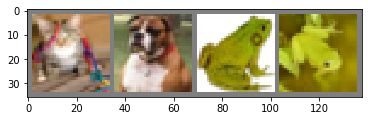

  cat   dog  frog  frog


In [192]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Define a Convolutional Neural Network

In [126]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss function and optimizer

In [63]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [64]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.172
[1,  4000] loss: 1.842
[1,  6000] loss: 1.678
[1,  8000] loss: 1.596
[1, 10000] loss: 1.516
[1, 12000] loss: 1.474
[2,  2000] loss: 1.389
[2,  4000] loss: 1.377
[2,  6000] loss: 1.371
[2,  8000] loss: 1.330
[2, 10000] loss: 1.315
[2, 12000] loss: 1.308
Finished Training


In [65]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Test the network on the test data

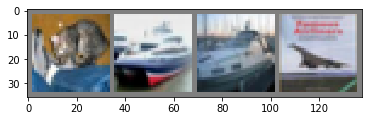

GroundTruth:    cat  ship  ship plane


In [66]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


# lib 导入

In [25]:
import torch
import numpy as np

# Tensor
https://pytorch.org/docs/stable/tensors.html

张量是一个多维数组，它是标量、向量、矩阵的高维拓展

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.
## Tensor and Variable
Variable是torch.autograd中的数据类型 主要用于封装Tensor，进行自动求导。在pytorch0.4.0以后将Variable并入Tensor

    data: 被包装的Tensor
    grad: data的梯度
    grad_fn: 创建Tensor的Function，是自动 求导的关键
    requires_grad: 指示是否需要梯度 
    is_leaf: 指示是否是叶子结点(张量)

## Tensor attrs

In [3]:
x = torch.arange(6).view(-1, 3)

### Get its size:

In [4]:
x.size()

torch.Size([2, 3])

In [5]:
x.size(1)  # 获取某个维度的dim

3

In [186]:
x.shape

torch.Size([2, 3])

## gen Tensor

### tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False)

• data: 数据, 可以是list, numpy
• dtype : 数据类型，默认与data的一致 
    • device : 所在设备, cuda/cpu
• requires_grad:是否需要梯度
• pin_memory:是否存于锁页内存

In [127]:
torch.tensor([1, 2])

tensor([1, 2])

### from_numpy(ndarray) -> Tensor
从torch.from_numpy创建的tensor于原ndarray共享内存

In [130]:
torch.from_numpy(np.array([1,3]))

tensor([1, 3])

### 依据数值创建

In [132]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [133]:
torch.zeros_like(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [10]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [134]:
torch.full((2, 3), 5)

../aten/src/ATen/native/TensorFactories.cpp:361: UserWarning: Deprecation warning: In a future PyTorch release torch.full will no longer return tensors of floating dtype by default. Instead, a bool fill_value will return a tensor of torch.bool dtype, and an integral fill_value will return a tensor of torch.long dtype. Set the optional `dtype` or `out` arguments to suppress this warning.


tensor([[5., 5., 5.],
        [5., 5., 5.]])

In [135]:
torch.arange(9)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [136]:
torch.linspace(1, 10, 5)

tensor([ 1.0000,  3.2500,  5.5000,  7.7500, 10.0000])

In [140]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [139]:
# 创建对数均分的1维张量
torch.logspace(1, 10, 100)

tensor([1.0000e+01, 1.2328e+01, 1.5199e+01, 1.8738e+01, 2.3101e+01, 2.8480e+01,
        3.5112e+01, 4.3288e+01, 5.3367e+01, 6.5793e+01, 8.1113e+01, 1.0000e+02,
        1.2328e+02, 1.5199e+02, 1.8738e+02, 2.3101e+02, 2.8480e+02, 3.5112e+02,
        4.3288e+02, 5.3367e+02, 6.5793e+02, 8.1113e+02, 1.0000e+03, 1.2328e+03,
        1.5199e+03, 1.8738e+03, 2.3101e+03, 2.8480e+03, 3.5112e+03, 4.3288e+03,
        5.3367e+03, 6.5793e+03, 8.1113e+03, 1.0000e+04, 1.2328e+04, 1.5199e+04,
        1.8738e+04, 2.3101e+04, 2.8480e+04, 3.5112e+04, 4.3288e+04, 5.3367e+04,
        6.5793e+04, 8.1113e+04, 1.0000e+05, 1.2328e+05, 1.5199e+05, 1.8738e+05,
        2.3101e+05, 2.8480e+05, 3.5112e+05, 4.3288e+05, 5.3367e+05, 6.5793e+05,
        8.1113e+05, 1.0000e+06, 1.2328e+06, 1.5199e+06, 1.8738e+06, 2.3101e+06,
        2.8480e+06, 3.5112e+06, 4.3288e+06, 5.3367e+06, 6.5793e+06, 8.1113e+06,
        1.0000e+07, 1.2328e+07, 1.5199e+07, 1.8738e+07, 2.3101e+07, 2.8480e+07,
        3.5112e+07, 4.3288e+07, 5.3367e+

#### Construct a randomly initialized matrix:
声明了一个未初始化的矩阵，但在使用前不包含确定的已知值。

In [6]:
x = torch.empty(5, 3)
x

tensor([[3.2870e+21, 5.2059e+22, 3.3091e+21],
        [4.2931e-08, 1.6800e-07, 3.1369e+27],
        [7.0800e+31, 3.1095e-18, 7.7052e+31],
        [1.9447e+31, 2.0558e+32, 1.8755e+28],
        [3.1093e-18, 2.9934e+32, 1.8528e+28]])

### 依概率分布创建张量

In [144]:
# 正态分布
torch.normal(mean=1, std=2, size=[2, 3])

tensor([[ 2.0179,  0.8916, -0.1481],
        [ 1.3215, -2.5404,  1.0174]])

In [5]:
# 均匀分布
x = torch.rand(5, 3)
x

tensor([[0.0839, 0.7643, 0.4382],
        [0.3033, 0.8193, 0.1281],
        [0.8989, 0.9061, 0.7433],
        [0.7744, 0.4719, 0.5584],
        [0.0186, 0.3912, 0.1602]])

In [141]:
# 标准正态分布
torch.randn([5, 3])

tensor([[-1.3886,  0.8938,  0.8417],
        [-0.6967,  1.2211, -0.8665],
        [ 0.4069,  0.8723,  0.5643],
        [ 0.0948, -0.1088,  0.2056],
        [-1.0987,  0.0246, -0.9158]])

In [145]:
# 生成生成从0到n-1的随机排列
torch.randperm(10)

tensor([6, 8, 4, 7, 5, 2, 3, 1, 0, 9])

In [146]:
torch.bernoulli(0.5,)

TypeError: bernoulli(): argument 'input' (position 1) must be Tensor, not float

In [219]:
b[0]

tensor([ 0, 10, 10])

In [220]:
a & b[0]

tensor([[ 0,  2,  2],
        [ 0,  0,  2],
        [ 0,  8,  8],
        [ 0, 10,  8]])

In [221]:
aa = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

In [222]:
bb = np.array([[0,10,10],[10,10,10],[7,8,9],[0,10,12]])

In [223]:
aa & bb

array([[ 0,  2,  2],
       [ 0,  0,  2],
       [ 7,  8,  9],
       [ 0, 10, 12]])

In [224]:
aa & bb[0]

array([[ 0,  2,  2],
       [ 0,  0,  2],
       [ 0,  8,  8],
       [ 0, 10,  8]])

In [218]:
a = torch.from_numpy(np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]]))
print(a,'\n')
b = torch.from_numpy(np.array([[0,10,10],[10,10,10],[7,8,9],[0,10,12]]))
print(b,'\n')
print(a & b,'\n')
print(b & a)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]) 

tensor([[ 0, 10, 10],
        [10, 10, 10],
        [ 7,  8,  9],
        [ 0, 10, 12]]) 

tensor([[ 0,  2,  2],
        [ 0,  0,  2],
        [ 7,  8,  9],
        [ 0, 10, 12]]) 

tensor([[ 0,  2,  2],
        [ 0,  0,  2],
        [ 7,  8,  9],
        [ 0, 10, 12]])


## 强制类型转换

### type_as(tensor) → Tensor

    Returns this tensor cast to the type of the given tensor.

    This is a no-op if the tensor is already of the correct type. This is equivalent to self.type(tensor.type())

## 张量拼接与切分

### 拼接

In [2]:
a = torch.arange(6).reshape(2, 3)
a

tensor([[0, 1, 2],
        [3, 4, 5]])

In [150]:
torch.cat([a, a])

tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])

In [151]:
torch.cat([a, a], dim=1)

tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])

In [152]:
torch.stack([a, a])

tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])

In [153]:
torch.stack([a, a], dim=1)

tensor([[[0, 1, 2],
         [0, 1, 2]],

        [[3, 4, 5],
         [3, 4, 5]]])

### 切分

#### torch.chunk()
功能:将张量按维度dim进行平均切分
返回值:张量列表
注意事项:若不能整除，最后一份张量小于 其他张量

In [155]:
torch.chunk(a, 3, dim=1)

(tensor([[0],
         [3]]), tensor([[1],
         [4]]), tensor([[2],
         [5]]))

In [156]:
torch.chunk(a, 2, dim=1)

(tensor([[0, 1],
         [3, 4]]), tensor([[2],
         [5]]))

#### torch.split(tensor, split_size_or_sections, dim=0)

In [3]:
torch.split(a, 1)

(tensor([[0, 1, 2]]), tensor([[3, 4, 5]]))

In [4]:
a.split(1)

(tensor([[0, 1, 2]]), tensor([[3, 4, 5]]))

In [5]:
a.split(1, dim=1)

(tensor([[0],
         [3]]), tensor([[1],
         [4]]), tensor([[2],
         [5]]))

## 张量索引

In [159]:
a[0, 1]

tensor(1)

In [161]:
a

tensor([[0, 1, 2],
        [3, 4, 5]])

### index_select

In [162]:
a.index_select(0, torch.tensor(1))

tensor([[3, 4, 5]])

In [163]:
a.index_select(0, torch.tensor([0,1]))

tensor([[0, 1, 2],
        [3, 4, 5]])

In [164]:
torch.index_select(a, 1, torch.tensor([0,2]))

tensor([[0, 2],
        [3, 5]])

### torch.masked_select()
功能:按mask中的True进行索引

返回值:一维张量

In [167]:
t = torch.randint(0, 9, size=(3, 3))
mask = t.le(5)  # le: <=
mask

tensor([[ True, False,  True],
        [ True,  True,  True],
        [ True, False,  True]])

In [168]:
torch.masked_select(t, mask)

tensor([5, 0, 1, 3, 4, 1, 0])

In [6]:
import torch

### torch.where

In [ ]:
torch.where(
    condition,  # condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
    x, 
    y
) -> Tensor

## 张量变换

### torch.reshape()
功能:变换张量形状

注意事项:当张量在内存中是连续时，新张 量与input共享数据内存

• input: 要变换的张量 
• shape: 新张量的形状

In [169]:
t = torch.randperm(8)
t_reshape = torch.reshape(t, (-1, 2, 2))    # -1
print("t:{}\nt_reshape:\n{}".format(t, t_reshape))

t[0] = 1024
print("t:{}\nt_reshape:\n{}".format(t, t_reshape))
print("t.data 内存地址:{}".format(id(t.data)))
print("t_reshape.data 内存地址:{}".format(id(t_reshape.data)))

t:tensor([1, 2, 3, 5, 7, 4, 6, 0])
t_reshape:
tensor([[[1, 2],
         [3, 5]],

        [[7, 4],
         [6, 0]]])
t:tensor([1024,    2,    3,    5,    7,    4,    6,    0])
t_reshape:
tensor([[[1024,    2],
         [   3,    5]],

        [[   7,    4],
         [   6,    0]]])
t.data 内存地址:6481941704
t_reshape.data 内存地址:6481941704


### torch.transpose()
功能:交换张量的两个维度 

• input: 要变换的张量
• dim0: 要交换的维度
• dim1: 要交换的维度

In [170]:
t = torch.rand((2, 3, 4))
t_transpose = torch.transpose(t, dim0=1, dim1=2)    # c*h*w     h*w*c
print("t shape:{}\nt_transpose shape: {}".format(t.shape, t_transpose.shape))

t shape:torch.Size([2, 3, 4])
t_transpose shape: torch.Size([2, 4, 3])


In [171]:
t

tensor([[[0.5767, 0.6817, 0.6154, 0.1999],
         [0.4417, 0.4720, 0.9115, 0.0849],
         [0.0277, 0.7797, 0.1309, 0.2334]],

        [[0.8531, 0.4334, 0.9189, 0.6155],
         [0.1755, 0.4395, 0.0836, 0.7417],
         [0.6370, 0.1990, 0.6498, 0.9281]]])

In [172]:
t_transpose

tensor([[[0.5767, 0.4417, 0.0277],
         [0.6817, 0.4720, 0.7797],
         [0.6154, 0.9115, 0.1309],
         [0.1999, 0.0849, 0.2334]],

        [[0.8531, 0.1755, 0.6370],
         [0.4334, 0.4395, 0.1990],
         [0.9189, 0.0836, 0.6498],
         [0.6155, 0.7417, 0.9281]]])

### torch.t() 
功能:2维张量转置，对矩阵而言，等价于 torch.transpose(input, 0, 1)

### torch.squeeze()
功能:压缩长度为1的维度(轴)

In [173]:
t = torch.rand((1, 2, 3, 1))
t

tensor([[[[0.1954],
          [0.2219],
          [0.4094]],

         [[0.2999],
          [0.9619],
          [0.3831]]]])

In [175]:
t_sq = torch.squeeze(t)
t_sq

tensor([[0.1954, 0.2219, 0.4094],
        [0.2999, 0.9619, 0.3831]])

In [176]:
t_0 = torch.squeeze(t, dim=0)
t_0

tensor([[[0.1954],
         [0.2219],
         [0.4094]],

        [[0.2999],
         [0.9619],
         [0.3831]]])

In [177]:
t_1 = torch.squeeze(t, dim=1)
t_1

tensor([[[[0.1954],
          [0.2219],
          [0.4094]],

         [[0.2999],
          [0.9619],
          [0.3831]]]])

In [178]:
print(t.shape)
print(t_sq.shape)
print(t_0.shape)
print(t_1.shape)

torch.Size([1, 2, 3, 1])
torch.Size([2, 3])
torch.Size([2, 3, 1])
torch.Size([1, 2, 3, 1])


### torch.unsqueeze() 
功能:依据dim扩展维度 • dim: 扩展的维度

In [179]:
t_0.unsqueeze(0)

tensor([[[[0.1954],
          [0.2219],
          [0.4094]],

         [[0.2999],
          [0.9619],
          [0.3831]]]])

## 张量数学运算

### clump

In [104]:
a = torch.rand(2, 3)
a

tensor([[0.4198, 0.2774, 0.0937],
        [0.6961, 0.0774, 0.7155]])

In [17]:
torch.clamp(a, 0.5, 0.7)

tensor([[0.5000, 0.5000, 0.5000],
        [0.7000, 0.6799, 0.7000]])

### gather
torch.gather 函数用于从参数 t 选择性输出特定 index 的矩阵，输出矩阵的大小跟 index 的大小是一样的，torch.gather 的 dim 参数用来选择 index 作用的 axis。

In [ ]:
torch.gather(input, dim, index)

index的维度要和input相同

dim表示index要选择的维度

#### 使用场景, 自己实现cross entropyloss，或focal loss

In [126]:
# 经过softmax的输出值
preds = torch.tensor([[0.4996, 0.5004],
        [0.4944, 0.5056],
        [0.5954, 0.4046],
        [0.5711, 0.4289],
        [0.6190, 0.3810],
        [0.5797, 0.4203],
        [0.5441, 0.4559]])
# groud truth
labels = torch.tensor([0, 0, 1, 1, 0, 1, 0,])

In [127]:
# 需要把相应的类别的y_pred选出来
y_pred = torch.gather(preds, 1, labels.unsqueeze(1))
y_pred

tensor([[0.4996],
        [0.4944],
        [0.4046],
        [0.4289],
        [0.6190],
        [0.4203],
        [0.5441]])

In [128]:
cross_entropy_loss = -torch.log(y_pred)
cross_entropy_loss

tensor([[0.6939],
        [0.7044],
        [0.9049],
        [0.8465],
        [0.4796],
        [0.8668],
        [0.6086]])

In [129]:
# 取均值
cross_entropy_loss.mean(0)

tensor([0.7293])

### max

In [106]:
a.max(1)

torch.return_types.max(
values=tensor([0.4198, 0.7155]),
indices=tensor([0, 2]))

In [107]:
w, e = a.max(1)

In [108]:
w

tensor([0.4198, 0.7155])

In [109]:
e

tensor([0, 2])

### mean

In [110]:
a.mean(1)

tensor([0.2637, 0.4963])

In [111]:
a

tensor([[0.4198, 0.2774, 0.0937],
        [0.6961, 0.0774, 0.7155]])

### masked_fill_

In [113]:
a_mask = torch.tensor([
    [1, 1, 0],
    [1, 0, 0]
])

In [114]:
a_mask==0

tensor([[False, False,  True],
        [False,  True,  True]])

In [115]:
a.masked_fill_(a_mask==0, 1e-9)

tensor([[4.1978e-01, 2.7744e-01, 1.0000e-09],
        [6.9611e-01, 1.0000e-09, 1.0000e-09]])

### masked_select
Returns a new 1-D tensor which indexes the :attr:`input` tensor according to
the boolean mask :attr:`mask` which is a `BoolTensor`.

The shapes of the :attr:`mask` tensor and the :attr:`input` tensor don't need
to match, but they must be :ref:`broadcastable <broadcasting-semantics>`.

In [119]:
torch.masked_select(a, a_mask!=0)

tensor([0.4198, 0.2774, 0.6961])

### torch.bmm(input, mat2, out=None) → Tensor

    Performs a batch matrix-matrix product of matrices stored in input and mat2.

    input and mat2 must be 3-D tensors each containing the same number of matrices.

    If input is a (b×n×m)(b \times n \times m)(b×n×m) tensor, mat2 is a (b×m×p)(b \times m \times p)(b×m×p) tensor, out will be a (b×n×p)(b \times n \times p)(b×n×p) tensor.

### add

In [134]:
a = torch.tensor([0.6, 0.8])

In [135]:
a.add(a, alpha=2)  # a + a*alpha

tensor([1.8000, 2.4000])

### mul

In [131]:
a = torch.rand(2, 3)
b = torch.rand(2, 3)

In [15]:
torch.mul(a, b)

tensor([[0.2364, 0.4633, 0.3512],
        [0.2279, 0.2244, 0.4190]])

In [14]:
torch.mul(a, b).squeeze()

tensor([[0.2364, 0.4633, 0.3512],
        [0.2279, 0.2244, 0.4190]])

### mean, std

In [8]:
t = torch.rand(2, 3)
t

tensor([[0.0802, 0.5049, 0.9776],
        [0.9938, 0.2298, 0.2362]])

In [9]:
t.mean()

tensor(0.5037)

In [10]:
t.mean(-1)

tensor([0.5209, 0.4866])

In [11]:
t.mean(-1, keepdim=True)

tensor([[0.5209],
        [0.4866]])

### tensor.contiguous()
https://blog.csdn.net/gdymind/article/details/82662502

在pytorch中，只有很少几个操作是不改变tensor的内容本身，而只是重新定义下标与元素的对应关系的。换句话说，这种操作不进行数据拷贝和数据的改变，变的是元数据。

这些操作是：

    narrow()，view()，expand()和transpose()

举个栗子，在使用transpose()进行转置操作时，pytorch并不会创建新的、转置后的tensor，而是修改了tensor中的一些属性（也就是元数据），使得此时的offset和stride是与转置tensor相对应的。转置的tensor和原tensor的内存是共享的！

也就是说，经过上述操作后得到的tensor，它内部数据的布局方式和从头开始创建一个这样的常规的tensor的布局方式是不一样的！于是…这就有contiguous()的用武之地了。

在上面的例子中，x是contiguous的，但y不是（因为内部数据不是通常的布局方式）。注意不要被contiguous的字面意思“连续的”误解，tensor中数据还是在内存中一块区域里，只是布局的问题！

当调用contiguous()时，会强制拷贝一份tensor，让它的布局和从头创建的一毛一样。

In [208]:
a = torch.arange(6).reshape(-1, 3)

In [209]:
a

tensor([[0, 1, 2],
        [3, 4, 5]])

In [210]:
id(a)

5615395320

In [211]:
b=a.transpose(0, 1)

In [212]:
id(b)

5614952664

In [213]:
b[0, 0] = 100

In [214]:
a

tensor([[100,   1,   2],
        [  3,   4,   5]])

In [215]:
c = a.transpose(0, 1).contiguous()

In [216]:
c [0, 0] = 111

In [217]:
a

tensor([[100,   1,   2],
        [  3,   4,   5]])

### torch.matmul(input, other, out=None) → Tensor

    Matrix product of two tensors.

    The behavior depends on the dimensionality of the tensors as follows:

        If both tensors are 1-dimensional, the dot product (scalar) is returned.

        If both arguments are 2-dimensional, the matrix-matrix product is returned.

        If the first argument is 1-dimensional and the second argument is 2-dimensional, a 1 is prepended to its dimension for the purpose of the matrix multiply. After the matrix multiply, the prepended dimension is removed.

        If the first argument is 2-dimensional and the second argument is 1-dimensional, the matrix-vector product is returned.

        If both arguments are at least 1-dimensional and at least one argument is N-dimensional (where N > 2), then a batched matrix multiply is returned. 
        If the first argument is 1-dimensional, a 1 is prepended to its dimension for the purpose of the batched matrix multiply and removed after. 
        If the second argument is 1-dimensional, a 1 is appended to its dimension for the purpose of the batched matrix multiple and removed after. The non-matrix (i.e. batch) dimensions are broadcasted (and thus must be broadcastable). 
        For example, if input is a (j×1×n×m)(j \times 1 \times n \times m)(j×1×n×m) tensor and other is a (k×m×p)(k \times m \times p)(k×m×p) tensor, out will be an (j×k×n×p)(j \times k \times n \times p)(j×k×n×p) tensor.


In [8]:
import torch
import numpy as np

### cosine_similarity
$$\text{similarity} = \dfrac{x_1 \cdot x_2}{\max(\Vert x_1 \Vert _2 \cdot \Vert x_2 \Vert _2, \epsilon)}$$

In [6]:
embeddings = [
    torch.tensor([[1., 2., 1.]]),
    torch.tensor([[1., 0., 1.]]),
]

In [11]:
embeddings = torch.tensor([
    [1., 2., 1.],
    [1., 0., 1.]
])

In [13]:
embeddings[0]

tensor([1., 2., 1.])

In [17]:
arr = embeddings.numpy()
arr

array([[1., 2., 1.],
       [1., 0., 1.]], dtype=float32)

In [19]:
arr[0].dot(arr[1])/np.sqrt(arr[0].dot(arr[0])*arr[1].dot(arr[1]))

0.57735026

In [15]:
torch.cosine_similarity(embeddings[0].view(1, -1), embeddings[1].view(1, -1))

tensor([0.5774])

# torchvision:计算机视觉工具包
* torchvision.transforms : 常用的图像预处理方法
* torchvision.datasets : 常用数据集的dataset实现，MNIST，CIFAR-10，ImageNet等
* torchvision.model : 常用的模型预训练，AlexNet，VGG， ResNet，GoogLeNet等

## torchvision.transforms : 常用的图像预处理方法 
    • 数据中心化
    • 数据标准化
    • 缩放
    • 裁剪
    • 旋转
    • 翻转
    • 填充
    • 噪声添加
    • 灰度变换
    • 线性变换
    • 仿射变换
    • 亮度、饱和度及对比度变换

### transforms.Normalize
功能:逐channel的对图像进行标准化 output = (input - mean) / std

    • mean:各通道的均值
    • std:各通道的标准差
    • inplace:是否原地操作

## torchvision.models
载入预训练模型

In [65]:
# export
import torchvision.models as models

In [66]:
model = models.resnet34(True)

In [69]:
model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [67]:
model.modules

<bound method Module.modules of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [ ]:
models.resnet18()

# DataLoader and Dataset

## torch.utils.data.DataLoader 
功能:构建可迭代的数据装载器

主要解决以下几个问题:
1. 读哪些数据?
Sampler输出的Index
2. 从哪读数据?
Dataset中的data_dir
3. 怎么读数据?
Dataset中的getitem


    • dataset: Dataset类，决定数据从哪读取 及如何读取
    • batchsize : 批大小
    • num_works: 是否多进程读取数据
    • shuffle: 每个epoch是否乱序
    • drop_last:当样本数不能被batchsize整 除时，是否舍弃最后一批数据

In [64]:
from torch.utils.data import DataLoader, Dataset

In [ ]:
DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None)

## torch.utils.data.Dataset
功能:Dataset抽象类，所有自定义的 Dataset需要继承它，并且复写 `__getitem__()`

getitem : 接收一个索引，返回一个样本

# torch.nn & torch.nn.functional

## torch.nn各个功能模块
* nn.Parameter：张量子类，表示可学习参数，如weight, bias
* nn.Module：所有网络层基类，管理网络属性
* nn.functional：函数具体实现，如卷积，池化，激活函数等
* nn.init：参数初始化方法

## 模型创建步骤
* 数据准备
* 模型构建
* 损失函数
* 优化器

## 模型构建两要素
### 构建子模块: `__init__()`
就是把该Module有的layers有塞进来，不必考虑顺序
### 拼接子模块: `forward()`
通过 连接 input output 运算等 把`__init__()`中的layers构成一个有机的整体

## nn.Module
    • 一个module可以包含多个子module
    • 一个module相当于一个运算，必须实现forward()函数 
    • 每个module都有8个字典管理它的属性
    
![](img/nnm01.png)

In [136]:
# Example of using Sequential
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

### 获取模型内部的子module

In [143]:
model.modules

<bound method Module.modules of Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)>

### 获取模型内部的参数

In [144]:
for p in model.parameters():
    print(p.size())

torch.Size([20, 1, 5, 5])
torch.Size([20])
torch.Size([64, 20, 5, 5])
torch.Size([64])


## 容器类

### torch.nn.Sequential
按顺序包装多个网络层

    • 顺序性:各网络层之间严格按照顺序构建
    • 自带forward():自带的forward里，通过for循环依次执行前向传播运算

In [136]:
# Example of using Sequential
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

In [194]:
model[0]

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [197]:
from collections import OrderedDict
# Example of using Sequential with OrderedDict
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))

In [198]:
model[0]

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [199]:
model['conv1']

TypeError: 'str' object cannot be interpreted as an integer

### torch.nn.ModuleList
像python的list一样包装多个网络层，以迭代方式调用网络层 

主要方法:

    • append():在ModuleList后面添加网络层
    • extend():拼接两个ModuleList
    • insert():指定在ModuleList中位置插入网络层

In [ ]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])

    def forward(self, x):
        # ModuleList can act as an iterable, or be indexed using ints
        for i, l in enumerate(self.linears):
            x = self.linears[i // 2](x) + l(x)
        return x

### torch.nn.ModuleDict
像python的dict一样包装多个网络层, ModuleDict is an ordered dictionary that respects. 以索引方式调用网络层 

主要方法:

    • clear():清空ModuleDict
    • items():返回可迭代的键值对(key-value pairs)
    • keys():返回字典的键(key)
    • values():返回字典的值(value)
    • pop():返回一对键值，并从字典中删除

In [ ]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.choices = nn.ModuleDict({
                'conv': nn.Conv2d(10, 10, 3),
                'pool': nn.MaxPool2d(3)
        })
        self.activations = nn.ModuleDict([
                ['lrelu', nn.LeakyReLU()],
                ['prelu', nn.PReLU()]
        ])

    def forward(self, x, choice, act):
        x = self.choices[choice](x)
        x = self.activations[act](x)
        return x

### 容器总结
* nn.Sequential:顺序性，各网络层之间严格按顺序执行，常用于block构建
* nn.ModuleList:迭代性，常用于大量重复网构建，通过for循环实现重复构建 
* nn.ModuleDict:索引性，常用于可选择的网络层

## 相关类

### torch.nn.Parameter
Parameters are Tensor subclasses

通过data属性获取到 parameter tensor.

## 线性层

In [9]:
from torch import nn

In [10]:
m = nn.Linear(20, 30)

In [13]:
m.weight.shape  # equal m._parameters['weight'].shape

torch.Size([30, 20])

In [17]:
type(m.weight)

torch.nn.parameter.Parameter

In [18]:
type(m._parameters['weight'])

torch.nn.parameter.Parameter

In [21]:
# 权值初始化
initrange = 0.5
m.weight.data.uniform_(-initrange, initrange)
m.bias.data.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])

In [24]:
x = torch.randn(128, 20)
output = m(x)  # forward
output.size()

torch.Size([128, 30])

## RNN

### torch.nn.LSTM
Applies a multi-layer long short-term memory (LSTM) RNN to an input sequence.

Inputs: input, (h_0, c_0)

If (h_0, c_0) is not provided, both h_0 and c_0 default to zero.

Outputs: output, (h_n, c_n)


In [87]:
rnn = nn.LSTM(10, 20, 1)  # input_size, hidden_size, num_layers

In [88]:
input1 = torch.randn(5, 3, 10)  #  seq_len, batch, embedding_size

In [90]:


h0 = torch.randn(1, 3, 20)  # 
c0 = torch.randn(1, 3, 20)
output, (hn, cn) = rnn(input1, (h0, c0))

In [92]:
output.shape  # 所有seq element的输出

torch.Size([5, 3, 20])

In [93]:
hn.shape

torch.Size([1, 3, 20])

In [95]:
output[-1]

tensor([[-0.1244, -0.0423, -0.0715,  0.0993,  0.0076, -0.0306, -0.2079, -0.1731,
         -0.0650, -0.1120, -0.1716,  0.0862,  0.1526,  0.0210,  0.2429, -0.3801,
          0.0815,  0.3206,  0.0126,  0.0161],
        [ 0.0132, -0.0114, -0.1110,  0.1884, -0.1763,  0.1574, -0.1779, -0.0043,
          0.0380, -0.0192, -0.1365,  0.0278,  0.1410,  0.0814,  0.1697,  0.0294,
          0.0606,  0.1546,  0.0837, -0.0532],
        [-0.0419, -0.0079, -0.1726,  0.0810, -0.1047, -0.1129, -0.0092, -0.0764,
         -0.0376, -0.0481, -0.1735,  0.0239,  0.0308, -0.0315,  0.0165, -0.0323,
         -0.0621, -0.0889,  0.0618,  0.0536]], grad_fn=<SelectBackward>)

In [94]:
hn  # 最后一个seq element的输出，equal to output[-1]

tensor([[[-0.1244, -0.0423, -0.0715,  0.0993,  0.0076, -0.0306, -0.2079,
          -0.1731, -0.0650, -0.1120, -0.1716,  0.0862,  0.1526,  0.0210,
           0.2429, -0.3801,  0.0815,  0.3206,  0.0126,  0.0161],
         [ 0.0132, -0.0114, -0.1110,  0.1884, -0.1763,  0.1574, -0.1779,
          -0.0043,  0.0380, -0.0192, -0.1365,  0.0278,  0.1410,  0.0814,
           0.1697,  0.0294,  0.0606,  0.1546,  0.0837, -0.0532],
         [-0.0419, -0.0079, -0.1726,  0.0810, -0.1047, -0.1129, -0.0092,
          -0.0764, -0.0376, -0.0481, -0.1735,  0.0239,  0.0308, -0.0315,
           0.0165, -0.0323, -0.0621, -0.0889,  0.0618,  0.0536]]],
       grad_fn=<StackBackward>)

In [97]:
birnn = nn.LSTM(10, 20, 1, bidirectional=True)

In [100]:
output, (hn, cn) = birnn(input1)

In [101]:
output.shape

torch.Size([5, 3, 40])

## 卷积层
卷积维度: 一般情况下，卷积核在几个维度上滑动，就是几维卷积。
![](img/conv01.png)
padding
![](img/conv02.png)
孔洞卷积
![](img/conv03.png)

### 卷积尺寸计算

#### 简化版
$$out_{size}=\frac{in_{size}-kernel_{size}}{stride}+1$$

#### 完整版
$$out_{size}=\frac{in_{size}+2*padding-dilation*(kernel_{size}-1)-1}{stride}+1$$

In [ ]:
torch.nn.Conv2d(
    in_channels,
    out_channels,  # Number of channels produced by the convolution。等于卷积核的个数
    kernel_size,
    stride=1,
    padding=0,  # Zero-padding added to both sides of the input. Default: 0。填充个数
    dilation=1,  # 孔洞卷积大小。常用于图像分割任务，主要作用是提升感受野
    groups=1,  # 分组卷积设置。主要用于模型轻量化。
    bias=True,
    padding_mode='zeros',
)

### 转置卷积 Transpose Convolution
转置卷积又称为反卷积(Deconvolution)和部分跨越卷积(Fractionally- strided Convolution) ，用于对图像进行上采样(UpSample)

为什么称为转置卷积? 假设图像尺寸为4\*4，卷积核为3\*3，padding=0，stride=1 

#### 正常卷积:

图像:$I_{𝟏𝟔∗𝟏}$ 卷积核: $K_{𝟒∗𝟏𝟔}$ 输出:$O_{𝟒∗𝟏} = K_{𝟒∗𝟏𝟔} ∗ I_{𝟏𝟔∗𝟏}$
#### 转置卷积:
假设图像尺寸为2\*2，卷积核为3\*3，padding=0，stride=1 

图像:$I_{4∗𝟏}$ 卷积核: $K_{16∗4}$ 输出:$O_{16∗𝟏} = K_{16∗4} ∗ I_{4∗𝟏}$

![](img/conv05.png)

## 池化层

### torch.nn.MaxPool1d

In [102]:
# pool of size=3, stride=2
m = nn.MaxPool1d(3, stride=3)
input1 = torch.randn(20, 16, 50)  # batch, channel, Lin
output = m(input1)

In [103]:
output.shape

torch.Size([20, 16, 16])

### MaxPool2d

In [ ]:
torch.nn.MaxPool2d(
    kernel_size,
    stride=None,
    padding=0,
    dilation=1,
    return_indices=False,
    ceil_mode=False,  # when True, will use `ceil` instead of `floor` to compute the output shape
)

### AvgPool2d

In [ ]:
torch.nn.AvgPool2d(
    kernel_size,
    stride=None,
    padding=0,
    ceil_mode=False,
    count_include_pad=True,  # 计算均值时是否考虑填充值
    divisor_override=None,  # if specified, it will be used as divisor, otherwise attr:`kernel_size` will be used
)

### MaxUnpool2d
功能:对二维信号(图像)进行最大值池化 上采样
![](img/conv06.png)

In [ ]:
torch.nn.MaxUnpool2d(kernel_size, stride=None, padding=0)

## PositionalEncoding
### 无可学习参数的PositionEncoding层

无参数的PositionEncoding计算速度快，还可以减小整个模型的尺寸，据说在有些任务中，效果与有参数的接近。

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model,dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

### 有可学习参数的PositionEncoding层

我曾在一个序列预测任务（非NLP）里面对比过两种PositionEncoding层，发现带有参数的PositionEncoding层效果明显比没有参数的PositionEncoding要好。

带参数的PositionEncoding层的定义更为简单，直接继承一个nn.Embedding，再续上一个dropout就可以了。因为nn.Embedding中包含了一个可以按索引取向量的权重矩阵weight。



In [ ]:
class LearnedPositionEncoding(nn.Embedding):
    def __init__(self,d_model, dropout = 0.1,max_len = 5000):
        super().__init__(max_len, d_model)
        self.dropout = nn.Dropout(p = dropout)
     
    def forward(self, x):
        weight = self.weight.data.unsqueeze(1)
        x = x + weight[:x.size(0),:]
        return self.dropout(x)

## Transformer



In [ ]:
torch.nn.Transformer(
    d_model=512, 
    nhead=8, 
    num_encoder_layers=6, 
    num_decoder_layers=6, 
    dim_feedforward=2048, 
    dropout=0.1, activation='relu', custom_encoder=None, custom_decoder=None)

In [ ]:
forward(
    src: torch.Tensor, 
    tgt: torch.Tensor, 
    src_mask: Optional[torch.Tensor] = None, 
    tgt_mask: Optional[torch.Tensor] = None, 
    memory_mask: Optional[torch.Tensor] = None, 
    src_key_padding_mask: Optional[torch.Tensor] = None, 
    tgt_key_padding_mask: Optional[torch.Tensor] = None, 
    memory_key_padding_mask: Optional[torch.Tensor] = None) → torch.Tensor

### transformer中有两种类型的mask
https://luozhouyang.github.io/transformer/

#### Padding mask
什么是padding mask呢？回想一下，我们的每个批次输入序列长度是不一样的！也就是说，我们要对输入序列进行对齐！具体来说，就是给在较短的序列后面填充0。因为这些填充的位置，其实是没什么意义的，所以我们的attention机制不应该把注意力放在这些位置上，所以我们需要进行一些处理。


src_key_padding_mask: (N,S) # batch_size, seq_len

tgt_key_padding_mask: (N,T) # batch_size, seq_len

memory_key_padding_mask: (N,S) # batch_size, seq_len


[src/tgt/memory]_key_padding_mask provides specified elements in the key to be ignored by the attention. 
* If a ByteTensor is provided, the non-zero positions will be ignored while the zero positions will be unchanged. 
* If a BoolTensor is provided, the positions with the value of True will be ignored while the position with the value of False will be unchanged.

#### Sequence mask
文章前面也提到，sequence mask是为了使得decoder不能看见未来的信息。也就是对于一个序列，在time_step为t的时刻，我们的解码输出应该只能依赖于t时刻之前的输出，而不能依赖t之后的输出。因此我们需要想一个办法，把t之后的信息给隐藏起来。

那么具体怎么做呢？也很简单：产生一个上三角矩阵，上三角的值全为1，下三角的值权威0，对角线也是0。把这个矩阵作用在每一个序列上，就可以达到我们的目的啦。

In [116]:
transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
src = torch.rand((10, 32, 512))  # seq_len, batch, embeding_size
tgt = torch.rand((20, 32, 512))

In [117]:
transformer_model.generate_square_subsequent_mask(5)

tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [30]:
out = transformer_model(src, tgt)

out.shape  # equal to tgt.size()

torch.Size([20, 32, 512])

### TransformerEncoderLayer
TransformerEncoderLayer is made up of self-attn and feedforward network. 

In [ ]:
torch.nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward=2048, dropout=0.1, activation='relu')

### TransformerEncoder
TransformerEncoder is a stack of N encoder layers

In [ ]:
torch.nn.TransformerEncoder(encoder_layer, num_layers, norm=None)

In [31]:
encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
src = torch.rand(10, 32, 512)
out = transformer_encoder(src)
out.shape

torch.Size([10, 32, 512])

In [ ]:
# Encoder
encoder_layer = nn.TransformerEncoderLayer(d_model,nhead,dim_feedforward,dropout)
encoder_norm = nn.LayerNorm(d_model)
self.encoder = nn.TransformerEncoder(encoder_layer,num_encoder_layers,encoder_norm)

### Sequence2sequence模型
https://www.jianshu.com/p/23b527e0f696

In [ ]:
class S2sTransformer(nn.Module):

    def __init__(self,vocab_size,position_enc,d_model = 512,nhead = 8,num_encoder_layers=6,
                 num_decoder_layers=6,dim_feedforward=2048,dropout=0.1):
        super(S2sTransformer,self).__init__()

        # Preprocess
        self.embedding = nn.Embedding(vocab_size,d_model)
        self.pos_encoder_src = position_enc(d_model=512)
        # tgt
        self.pos_encoder_tgt = position_enc(d_model=512)

        # Encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model,nhead,dim_feedforward,dropout)
        encoder_norm = nn.LayerNorm(d_model)
        self.encoder = nn.TransformerEncoder(encoder_layer,num_encoder_layers,encoder_norm)

        # Decoder
        decoder_layer = nn.TransformerDecoderLayer(d_model,nhead,dim_feedforward,dropout)
        decoder_norm = nn.LayerNorm(d_model)
        self.decoder = nn.TransformerDecoder(decoder_layer,num_decoder_layers,decoder_norm)
        self.output_layer = nn.Linear(d_model,vocab_size)

        self._reset_parameters()
        self.d_model = d_model
        self.nhead = nhead


    def forward(self, src,tgt,src_mask = None,tgt_mask = None,
                memory_mask = None,src_key_padding_mask = None,
                tgt_key_padding_mask = None,memory_key_padding_mask = None):

        # word embedding
        src = self.embedding(src)
        tgt = self.embedding(tgt)

        # shape check
        if src.size(1) != tgt.size(1):
            raise RuntimeError("the batch number of src and tgt must be equal")
        if src.size(2) != self.d_model or tgt.size(2) != self.d_model:
            raise RuntimeError("the feature number of src and tgt must be equal to d_model")

        # position encoding
        src = self.pos_encoder_src(src)
        tgt = self.pos_encoder_tgt(tgt)

        memory = self.encoder(src, mask=src_mask, src_key_padding_mask=src_key_padding_mask)
        output = self.decoder(tgt, memory, tgt_mask=tgt_mask, memory_mask=memory_mask,
                              tgt_key_padding_mask=tgt_key_padding_mask,
                              memory_key_padding_mask=memory_key_padding_mask)
        output = self.output_layer(output)
        # return output
        return softmax(output,dim = 2)


    def generate_square_subsequent_mask(self, sz):
        r"""Generate a square mask for the sequence. The masked positions are filled with float('-inf').
            Unmasked positions are filled with float(0.0).
        """
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def _reset_parameters(self):
        r"""Initiate parameters in the transformer model."""

        for p in self.parameters():
            if p.dim() > 1:
                xavier_uniform_(p)

## Norm层

### torch.nn.LayerNorm

In [ ]:
torch.nn.LayerNorm(
    normalized_shape: Union[int, List[int], torch.Size], 
    eps: float = 1e-05, 
    elementwise_affine: bool = True)

In [ ]:
>>> input = torch.randn(20, 5, 10, 10)
>>> # With Learnable Parameters
>>> m = nn.LayerNorm(input.size()[1:])
>>> # Without Learnable Parameters
>>> m = nn.LayerNorm(input.size()[1:], elementwise_affine=False)
>>> # Normalize over last two dimensions
>>> m = nn.LayerNorm([10, 10])
>>> # Normalize over last dimension of size 10
>>> m = nn.LayerNorm(10)
>>> # Activating the module
>>> output = m(input)

## 激活函数层

### nn.Sigmoid
$$y=\frac{1}{1+e^{-x}}$$

### nn.tanh
$$y=\frac{\sin x}{\cos x}=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$

### nn.ReLU

### nn.LeakyReLU
negative_slope: 负半轴斜率(固定，很小如0.01
### nn.PReLU
init: 可学习斜率
### nn.RReLU(random，负半轴斜率每次都从均匀分布采样
• lower: 均匀分布下限

• upper:均匀分布上限

# 权值初始化
假设当前层的输入和权值都服从方差为1，均值为0的分布，假设当前层的神经元个数为N。

那么当前层的输出的方差会是输入方差的N倍。

如果层数很深，则会随着前向传播而造成尺度爆炸，无法完成前向传播。

## Xavier初始化
方差一致性:保持数据尺度维持在恰当范围，通常方差为1 

激活函数:饱和函数，如Sigmoid，Tanh

$$W\sim U[-\frac{\sqrt 6}{\sqrt{n_i, n_{i+1}}}, \frac{\sqrt 6}{\sqrt{n_i, n_{i+1}}}]$$
## Kaiming初始化
激活函数:ReLU及其变种

$$std(W)=\sqrt{\frac{2}{(1+a^2)*n_i}}$$

## 十种初始化方法

In [ ]:
1. Xavier均匀分布 2. Xavier正态分布 3. Kaiming均匀分布 4. Kaiming正态分布 5. 均匀分布
6. 正态分布
7. 常数分布
8. 正交矩阵初始化 9. 单位矩阵初始化 10. 稀疏矩阵初始化

## nn.init.calculate_gain
主要功能:计算激活函数的方差变化尺度(输入数据的标准差/输出数据的标准差)

主要参数

• nonlinearity: 激活函数名称

• param: 激活函数的参数，如Leaky ReLU 的negative_slop

In [20]:
nn.init.calculate_gain('tanh')

1.6666666666666667

In [21]:
nn.init.calculate_gain('relu')

1.4142135623730951

## 初始化举例

In [19]:
import torch.nn as nn
import torch.nn.functional as F
class TextSentiment(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super().__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        # nn.init.uniform_(self.fc.weight.data, -initrange, initrange)
        # nn.init.xavier_normal_(self.fc.weight.data)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

# torch.optim
https://pytorch.org/docs/stable/optim.html

pytorch的优化器:管理并更新模型中可学习参数的值，使得模型输出更接近 真实标签

    导数:函数在指定坐标轴上的变化率 
    方向导数:指定方向上的变化率 
    梯度:一个向量，方向为方向导数 取得最大值的方向
    
## 基本属性
    • defaults:优化器超参数
    • state:参数的缓存，如momentum的缓存
    • params_groups:管理的参数组
    • _step_count:记录更新次数，学习率调整中使用

## 基本方法
    • zero_grad():清空所管理参数的梯度
    • step():执行一步更新
    • add_param_group():添加参数组
    • state_dict():获取优化器当前状态信息字典 
    • load_state_dict() :加载状态信息字典

1. optim.SGD:随机梯度下降法
2. optim.Adagrad:自适应学习率梯度下降法 
3. optim.RMSprop: Adagrad的改进  
http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf
4. optim.Adadelta: Adagrad的改进
5. optim.Adam:RMSprop结合Momentum   
《Adam: A Method for Stochastic Optimization》
6. optim.Adamax:Adam增加学习率上限
7. optim.SparseAdam:稀疏版的Adam
8. optim.ASGD:随机平均梯度下降
9. optim.Rprop:弹性反向传播
10. optim.LBFGS:BFGS的改进

# 学习率调整
## class _LRScheduler 

主要属性:

    • optimizer:关联的优化器 
    • last_epoch:记录epoch数 
    • base_lrs:记录初始学习率
    
## pytorch提供的lr调整策略
### StepLR 
功能:等间隔调整学习率 

主要参数:

    • step_size:调整间隔数 
    • gamma:调整系数

调整方式:lr = lr * gamma

### MultiStepLR 功能:按给定间隔调整学习率 主要参数:
• milestones:设定调整时刻数 

• gamma:调整系数

调整方式:lr = lr * gamma

### ExponentialLR 功能:按指数衰减调整学习率 主要参数:
• gamma:指数的底
调整方式:lr = lr * gamma ** epoch

### CosineAnnealingLR 功能:余弦周期调整学习率 主要参数:
• T_max:下降周期

• eta_min:学习率下限

### ReduceLRonPlateau
功能:监控指标，当指标不再变化则调整
主要参数:
• mode:min/max 两种模式
• factor:调整系数
• patience:“耐心”，接受几次不变化
• cooldown:“冷却时间”，停止监控一段时间 • verbose:是否打印日志
• min_lr:学习率下限
• eps:学习率衰减最小值

### LambdaLR 功能:自定义调整策略 主要参数:
• lr_lambda:function or list

学习率调整小结
1. 有序调整:Step、MultiStep、Exponential 和 CosineAnnealing
2. 自适应调整:ReduceLROnPleateau 
3. 自定义调整:Lambda

## finetune
模型微调训练方法:
1. 固定预训练的参数(requires_grad =False;lr=0) 
2. Features Extractor较小学习率(params_group)

In [ ]:
# 法1 : 冻结卷积层
flag_m1 = 0
# flag_m1 = 1
if flag_m1:
    for param in resnet18_ft.parameters():
        param.requires_grad = False
    print("conv1.weights[0, 0, ...]:\n {}".format(resnet18_ft.conv1.weight[0, 0, ...]))

# 法2 : conv 小学习率
# flag = 0
flag = 1
if flag:
    fc_params_id = list(map(id, resnet18_ft.fc.parameters()))     # 返回的是parameters的 内存地址
    base_params = filter(lambda p: id(p) not in fc_params_id, resnet18_ft.parameters())
    optimizer = optim.SGD([
        {'params': base_params, 'lr': LR*0.1},   # 0
        {'params': resnet18_ft.fc.parameters(), 'lr': LR}], momentum=0.9)


# torch.autograd

In [27]:
from torch import autograd

In [43]:
x = torch.tensor(1.)
a = torch.tensor(1., requires_grad=True)
b = torch.tensor(2., requires_grad=True)
c = torch.tensor(3., requires_grad=True)

In [44]:
y = a**2*x + b*x + c

In [41]:
y.backward() 
a.grad, b.grad, c.grad

(tensor(2.), tensor(1.), tensor(1.))

In [45]:
# or 
autograd.grad(y, [a,b,c])

(tensor(2.), tensor(1.), tensor(1.))

# torch api
https://pytorch.org/docs/stable/torch.html

# Utilities
https://pytorch.org/docs/stable/nn.html#utilities

## clip_grad_value_
https://zhuanlan.zhihu.com/p/99953668

https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_value_.html#torch.nn.utils.clip_grad_value_

梯度裁剪

In [ ]:
torch.nn.utils.clip_grad_value_(parameters, clip_value)

In [ ]:
# source code
def clip_grad_value_(parameters, clip_value):
    r"""Clips gradient of an iterable of parameters at specified value.
    Gradients are modified in-place.

    Arguments:
        parameters (Iterable[Tensor] or Tensor): an iterable of Tensors or a
            single Tensor that will have gradients normalized
        clip_value (float or int): maximum allowed value of the gradients.
            The gradients are clipped in the range
    """

    if isinstance(parameters, torch.Tensor):
        parameters = [parameters]
    clip_value = float(clip_value)
    for p in filter(lambda p: p.grad is not None, parameters):
        p.grad.data.clamp_(min=-clip_value, max=clip_value)

In [145]:
class LinearNet(nn.Module):
    def __init__(self, features_in=1, features_out=1):
        super().__init__()
        self.linear = nn.Linear(features_in, features_out)
        self._init_weight()

    def forward(self, x):
        return self.linear(x)
    
    def _init_weight(self):
        nn.init.constant_(self.linear.weight, val=1)
        nn.init.constant_(self.linear.bias, val=0)

In [147]:
# 定义
net = LinearNet()
mse_fn = nn.L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
# 网络输入和标签
x = torch.FloatTensor([120])
target_value = torch.FloatTensor([2])
# loss计算
predict = net(x)
loss = mse_fn(predict, target_value)

In [148]:
predict

tensor([120.], grad_fn=<AddBackward0>)

In [149]:
loss

tensor(118., grad_fn=<L1LossBackward>)

In [150]:
loss.backward()
print("grad before clip:"+str(net.linear.weight.grad))
nn.utils.clip_grad_value_(net.linear.weight, clip_value=1.1)
print("grad after clip:"+str(net.linear.weight.grad))

grad before clip:tensor([[120.]])
grad after clip:tensor([[1.1000]])


## pad_sequence
https://suzyahyah.github.io/pytorch/2019/07/01/DataLoader-Pad-Pack-Sequence.html

### pad_sequence to convert variable length sequences to same size

In [53]:
from torch import nn
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
x_seq = [
    torch.tensor([5, 18, 29]), 
    torch.tensor([32, 100]), 
    torch.tensor([699, 6, 9, 17])
]
x_padded = pad_sequence(x_seq, batch_first=True, padding_value=0)
x_padded

tensor([[  5,  18,  29,   0],
        [ 32, 100,   0,   0],
        [699,   6,   9,  17]])

In [ ]:
For batch processing, a typical pattern is to use this with Pytorch’s DataLoader and Dataset:

In [ ]:
from torch.utils.data import Dataset, DataLoader
## refer to pytorch tutorials on how to inherit from Dataset class
dataset = Dataset(...)
data_loader = DataLoader(dataset=dataset, batch_size=32, shuffle=True, collate_fn=pad_collate)

def pad_collate(batch):
  (xx, yy) = zip(*batch)
  x_lens = [len(x) for x in xx]
  y_lens = [len(y) for y in yy]

  xx_pad = pad_sequence(xx, batch_first=True, padding_value=0)
  yy_pad = pad_sequence(yy, batch_first=True, padding_value=0)

  return xx_pad, yy_pad, x_lens, y_lens

### Convert padded sequences to embeddings

In [ ]:
embedding = nn.Embedding(vocab_size, embedding_dim)
for (x_padded, y_padded, x_lens, y_lens) in enumerate(data_loader):
  x_embed = embedding(x_padded)

In [55]:
embedding_dim = 5
vob_size = 1000
embedding = nn.Embedding(vob_size, embedding_dim)
x_embed = embedding(x_padded)

In [51]:
x_embed.shape

torch.Size([3, 4, 5])

In [54]:
x_packed = pack_padded_sequence(x_embed, [3, 2, 4], batch_first=True, enforce_sorted=False)
x_packed

PackedSequence(data=tensor([[ 0.5252,  0.8362,  1.1393,  0.3071, -0.3895],
        [ 0.6688, -0.6191,  0.8454, -0.3163, -0.6356],
        [-0.0812, -1.1087,  2.4557, -1.0208,  2.2698],
        [-0.3954,  0.1666, -0.4051, -0.4502,  0.2692],
        [-2.2914,  0.3807,  1.3536, -0.5610,  0.1074],
        [-0.3659, -0.1681, -0.1752,  1.1853, -0.9145],
        [-1.4882,  0.6698,  1.1393,  0.0200, -0.8313],
        [-0.0207,  0.5845,  1.0133, -1.8247, -2.8377],
        [-0.5514, -1.0893, -0.7097,  1.7510, -1.6252]],
       grad_fn=<PackPaddedSequenceBackward>), batch_sizes=tensor([3, 3, 2, 1]), sorted_indices=tensor([2, 0, 1]), unsorted_indices=tensor([1, 2, 0]))

In [57]:
h_dim = 10
n_layers = 1
rnn = nn.GRU(embedding_dim, h_dim, n_layers, batch_first=True)

In [65]:
hidden = torch.zeros((1, 3, 10))
output_packed, hidden = rnn(x_packed, hidden)

In [60]:
output_packed

PackedSequence(data=tensor([[ 0.0563,  0.1575, -0.0926, -0.1861, -0.0318,  0.2794,  0.0795,  0.1051,
          0.1107,  0.0018],
        [-0.0420, -0.0289,  0.2141, -0.1463, -0.1701,  0.1181,  0.2335, -0.1500,
         -0.1298,  0.0032],
        [ 0.2677, -0.1951, -0.0147, -0.4717, -0.2592,  0.3746,  0.0140,  0.3341,
          0.1634,  0.2654],
        [ 0.1960, -0.1801, -0.2302, -0.1667, -0.1394,  0.3125,  0.1049,  0.1050,
          0.0325, -0.0654],
        [ 0.1856, -0.3599, -0.3315, -0.1492,  0.0558,  0.1694,  0.2388,  0.2492,
          0.3313,  0.5142],
        [ 0.0650, -0.2714, -0.2284, -0.1213, -0.3386,  0.2859,  0.1472,  0.0692,
         -0.2625,  0.2844],
        [ 0.2055, -0.2502, -0.4189, -0.0743,  0.0574,  0.3002,  0.1425,  0.2216,
          0.1985,  0.3188],
        [ 0.0353,  0.0804, -0.0954, -0.0091,  0.2367,  0.1685,  0.4627, -0.2842,
          0.1381,  0.0260],
        [-0.1437, -0.3091, -0.3145,  0.1768, -0.3265,  0.0643,  0.3470, -0.2125,
         -0.4193,  0.3295]]

In [ ]:
pad_packed_sequence on our packed RNN output

In [61]:
from torch.nn.utils.rnn import pad_packed_sequence
output_padded, output_lengths = pad_packed_sequence(output_packed, batch_first=True)


In [63]:
output_padded.shape

torch.Size([3, 4, 10])

In [62]:
output_padded

tensor([[[-0.0420, -0.0289,  0.2141, -0.1463, -0.1701,  0.1181,  0.2335,
          -0.1500, -0.1298,  0.0032],
         [ 0.1856, -0.3599, -0.3315, -0.1492,  0.0558,  0.1694,  0.2388,
           0.2492,  0.3313,  0.5142],
         [ 0.0353,  0.0804, -0.0954, -0.0091,  0.2367,  0.1685,  0.4627,
          -0.2842,  0.1381,  0.0260],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000]],

        [[ 0.2677, -0.1951, -0.0147, -0.4717, -0.2592,  0.3746,  0.0140,
           0.3341,  0.1634,  0.2654],
         [ 0.0650, -0.2714, -0.2284, -0.1213, -0.3386,  0.2859,  0.1472,
           0.0692, -0.2625,  0.2844],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000]],

        [[ 0.0563,  0.1575, -0.0926, -0.1861, -0.0318,  0.2794,  0.0795,
           0.1051,  0.1107,  0.0018